In [1]:
import sqlite3
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Importando os bancos de dados

In [2]:
conn = sqlite3.connect(os.path.join('pib.db'))
query= "SELECT * FROM pib"
pib = pd.read_sql(query,conn)

In [3]:
conn = sqlite3.connect(os.path.join('racial.db'))
query= "SELECT * FROM racial"
racial = pd.read_sql(query,conn)

### Transformando os DataFrames para o tipo GeoDataFrame

In [5]:
pib['geometry']=gpd.GeoSeries.from_wkt(pib['geometry'])
pib = gpd.GeoDataFrame(pib, geometry='geometry')

In [6]:
racial['geometry']=gpd.GeoSeries.from_wkt(racial['geometry'])
racial = gpd.GeoDataFrame(racial, geometry='geometry')

In [2]:
gjson = "geojs-100-mun.json"
br = gpd.read_file(gjson)
br = br.drop(columns = 'description')

In [3]:
br['name'] = br['name'].str.title()
br.head()

,id,name,geometry
0,1100015,Alta Floresta D'Oeste,"POLYGON ((-62.18209 -11.86686, -62.16230 -11.8..."
1,1100023,Ariquemes,"POLYGON ((-62.53595 -9.73182, -62.50782 -9.754..."
2,1100031,Cabixi,"POLYGON ((-60.39940 -13.45584, -60.40195 -13.4..."
3,1100049,Cacoal,"POLYGON ((-61.00051 -11.39796, -61.01794 -11.4..."
4,1100056,Cerejeiras,"POLYGON ((-61.50047 -13.00392, -61.47901 -13.0..."


In [4]:
gjson1 = "pib.json"
pib = gpd.read_file(gjson1)
pib = pib.drop(columns = 'id')

In [5]:
pib = pib.sort_values('nome')
pib['nome'] = pib['nome'].str.title()
pib.head()

,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,legenda,classe,geometry
4229,254,SERGIPE,Arauá,2010,63633.420,12042.0,5284.29,Produto Interno Bruto per capita,- 9639.65,1,"MULTIPOLYGON (((-37.50771 -11.27151, -37.50658..."
3330,1076,GOIÁS,Abadia De Goiás,2010,38975.133,6301.0,6185.55,Produto Interno Bruto per capita,- 9639.65,1,"MULTIPOLYGON (((-49.44332 -16.72349, -49.44079..."
3492,2687,MINAS GERAIS,Abadia Dos Dourados,2010,71222.170,6805.0,10466.15,Produto Interno Bruto per capita,9639.65 - 22144.80,2,"MULTIPOLYGON (((-47.42611 -18.16380, -47.42276..."
3976,1077,GOIÁS,Abadiânia,2010,82400.490,13378.0,6159.40,Produto Interno Bruto per capita,- 9639.65,1,"MULTIPOLYGON (((-48.79594 -16.01553, -48.79546..."
2115,2138,PARÁ,Abaetetuba,2010,456256.940,139819.0,3263.20,Produto Interno Bruto per capita,- 9639.65,1,"MULTIPOLYGON (((-48.80043 -1.60629, -48.79494 ..."


In [22]:
pib['PIB_percapita'] = pib['PIB_percapita'].astype(float)
pib['Pop_est_2009'] = pib['Pop_est_2009'].astype(float)
pib['UF'] = pib['UF'].astype(str)

Text(0.5, 1.0, 'População de cada município do Brasil')

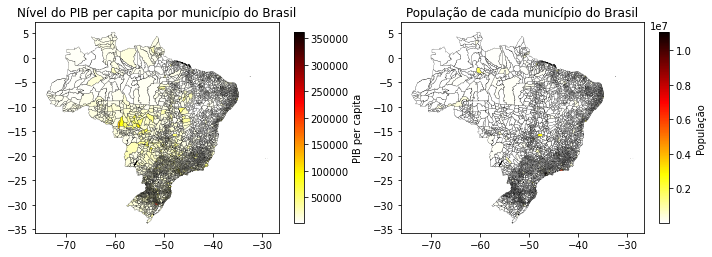

In [7]:
f = plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
pib.plot(column='PIB_percapita', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "PIB per capita", 'shrink': 0.7})
plt.title('Nível do PIB per capita por município do Brasil') 

ax=f.add_subplot(122)
pib.plot(column='Pop_est_2009', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "População", 'shrink': 0.7})
plt.title('População de cada município do Brasil')

In [8]:
am = pib[pib['UF'] == 'AMAZONAS']

Text(0.5, 1.0, 'População de cada município do Amazonas')

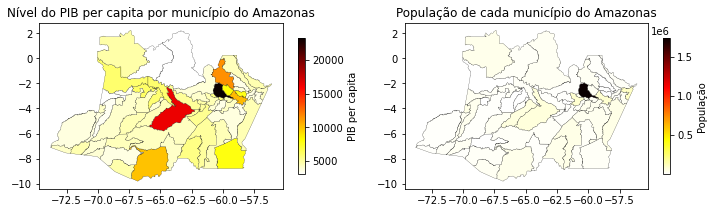

In [9]:
f = plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
am.plot(column='PIB_percapita', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "PIB per capita", 'shrink': 0.5})
plt.title('Nível do PIB per capita por município do Amazonas') 

ax=f.add_subplot(122)
am.plot(column='Pop_est_2009', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "População", 'shrink': 0.5})
plt.title('População de cada município do Amazonas')

In [10]:
se = pib[pib['UF'] == 'SERGIPE']

Text(0.5, 1.0, 'População de cada município de Sergipe')

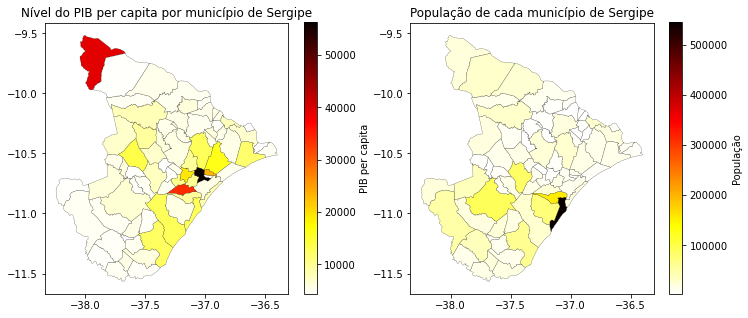

In [11]:
f = plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
se.plot(column='PIB_percapita', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "PIB per capita"})
plt.title('Nível do PIB per capita por município de Sergipe') 

ax=f.add_subplot(122)
se.plot(column='Pop_est_2009', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "População"})
plt.title('População de cada município de Sergipe')

In [12]:
es = pib[pib['UF'] == 'ESPIRITO SANTO']

Text(0.5, 1.0, 'População de cada município do Espiríto Santo')

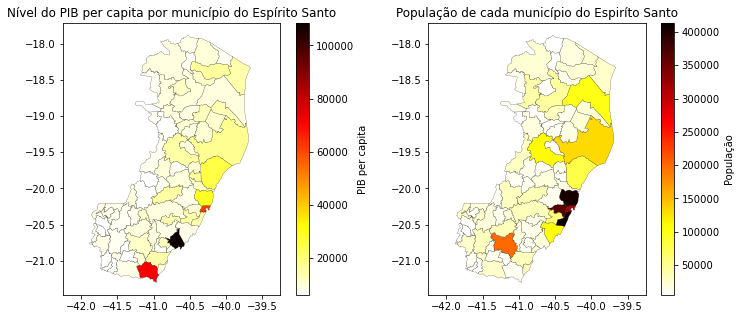

In [13]:
f = plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
es.plot(column='PIB_percapita', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "PIB per capita"})
plt.xlim(-42.25,-39.25)
plt.title('Nível do PIB per capita por município do Espírito Santo') 

ax=f.add_subplot(122)
es.plot(column='Pop_est_2009', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "População"})
plt.xlim(-42.25,-39.25)
plt.title('População de cada município do Espiríto Santo')

In [14]:
go = pib[pib['UF'] == 'GOIÁS']

Text(0.5, 1.0, 'População de cada município de Goiás')

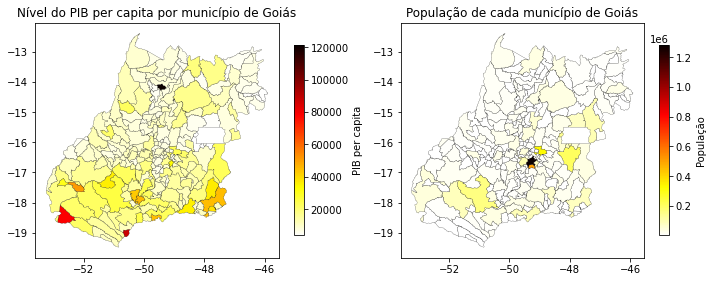

In [15]:
f = plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
go.plot(column='PIB_percapita', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "PIB per capita", 'shrink': 0.7})
plt.title('Nível do PIB per capita por município de Goiás')

ax=f.add_subplot(122)
go.plot(column='Pop_est_2009', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "População", 'shrink': 0.7})
plt.title('População de cada município de Goiás')

In [16]:
br_a1 = pib[pib['PIB_percapita'] < 10977.027145] #PIB per capita abaixo da média
br_a2 = pib[pib['PIB_percapita'] >= 10977.027145] #PIB per capita acima da média
br_a3 = pib[pib['Pop_est_2009'] < 34405.572763] #População abaixo da média
br_a4 = pib[pib['Pop_est_2009'] >= 34405.572763] #População acima da média

<AxesSubplot:>

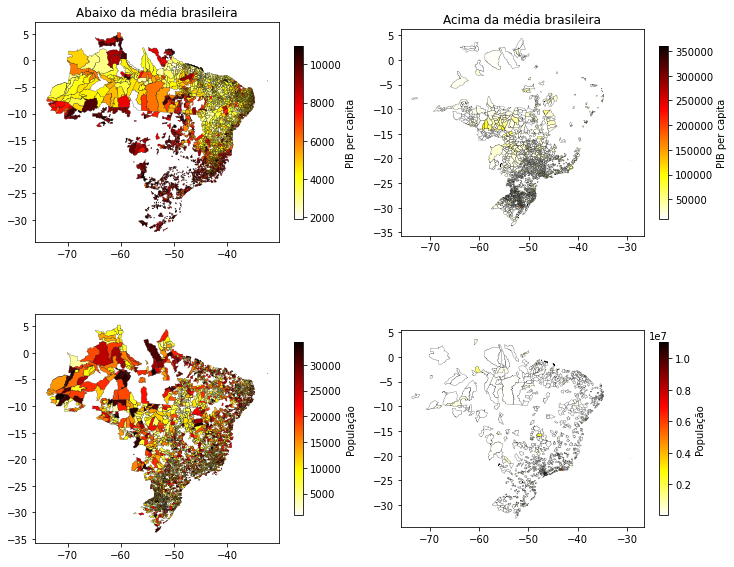

In [17]:
f = plt.figure(figsize=(12,10))

ax=f.add_subplot(221)
br_a1.plot(column='PIB_percapita', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "PIB per capita", 'shrink': 0.7})
plt.title('Abaixo da média brasileira')

ax=f.add_subplot(222)
br_a2.plot(column='PIB_percapita', cmap='hot_r', legend=True, edgecolor='black',linewidth=0.2,  figsize=(15,8), ax=ax, legend_kwds={'label': "PIB per capita", 'shrink': 0.7})
plt.title('Acima da média brasileira')

ax=f.add_subplot(223)
br_a3.plot(column='Pop_est_2009', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "População", 'shrink': 0.7})

ax=f.add_subplot(224)
br_a4.plot(column='Pop_est_2009', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "População", 'shrink': 0.7})

In [18]:
print(pib['UF'].unique())

['SERGIPE' 'GOIÁS' 'MINAS GERAIS' 'PARÁ' 'CEARÁ' 'BAHIA' 'PARANÁ'
 'SANTA CATARINA' 'PERNAMBUCO' 'TOCANTINS' 'RIO GRANDE DO NORTE' 'PIAUÍ'
 'RIO GRANDE DO SUL' 'MATO GROSSO' 'ACRE' 'SÃO PAULO' 'ESPIRITO SANTO'
 'MARANHÃO' 'PARAÍBA' 'MATO GROSSO DO SUL' 'RONDÔNIA' 'RORAIMA' 'AMAZONAS'
 'AMAPÁ' 'ALAGOAS' 'RIO DE JANEIRO' 'DISTRITO FEDERAL']


In [24]:
nordeste = pib[pib['UF'].isin(['SERGIPE', 'CEARÁ', 'BAHIA', 'PERNAMBUCO', 'RIO GRANDE DO NORTE', 'PIAUÍ', 'MARANHÃO', 'PARAÍBA', 'ALAGOAS'])]

Text(0.5, 1.0, 'População de cada município da região nordeste')

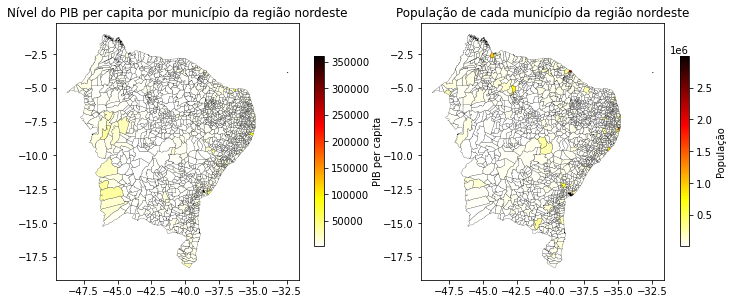

In [30]:
f = plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
nordeste.plot(column='PIB_percapita', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "PIB per capita", 'shrink': 0.7})
plt.title('Nível do PIB per capita por município da região nordeste') 

ax=f.add_subplot(122)
nordeste.plot(column='Pop_est_2009', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "População", 'shrink': 0.7})
plt.title('População de cada município da região nordeste')

In [26]:
sul = pib[pib['UF'].isin(['SANTA CATARINA', 'PARANÁ', 'RIO GRANDE DO SUL'])]

Text(0.5, 1.0, 'População de cada município da região sul')

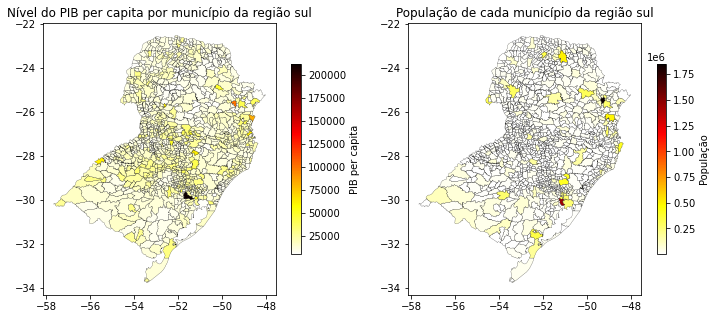

In [29]:
f = plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sul.plot(column='PIB_percapita', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "PIB per capita", 'shrink': 0.7})
plt.title('Nível do PIB per capita por município da região sul') 

ax=f.add_subplot(122)
sul.plot(column='Pop_est_2009', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "População", 'shrink': 0.7})
plt.title('População de cada município da região sul')